<a href="https://colab.research.google.com/github/FrancescoZanni/MLPNS_FZanni/blob/main/MLPNS_NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Primo esempio di shallow NN

https://iamtrask.github.io/2015/07/12/basic-python-network/

In [1]:
import numpy as np 
import pylab as pl 


In [2]:
#set molto piccolo di osservazioni e variabili (definite ad hoc per convergere, 
#non è scontato che cambiando i valori iniziali continui a convergere)
X = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])


(-0.5, 2.5, 3.5, -0.5)

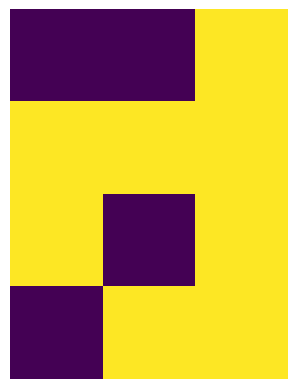

In [3]:
pl.imshow(X)
pl.axis("off")

In [4]:
y=np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [5]:
y.shape

(4, 1)

In [6]:
print("input: ", X)
print("output: ", y)
#l'idea è di predire l'output sulla base della matrice

input:  [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output:  [[0]
 [1]
 [1]
 [0]]


In [7]:
#Lo faccio con un SLP
# 4 osservazioni, 3 neuroni, 1 layer
# i pesi e i bias vengono imparati, la activation function è un hyperparameter
#voglio che il risultato sia probabilistico! poi posso convertirlo su 1 e 0 stabilendo una threshold ma sta a me deciderlo a pposteriori

#ovviamente SIGMOID

def sigmoid(x): 
  return 1./(1.+ np.exp(-x))
  

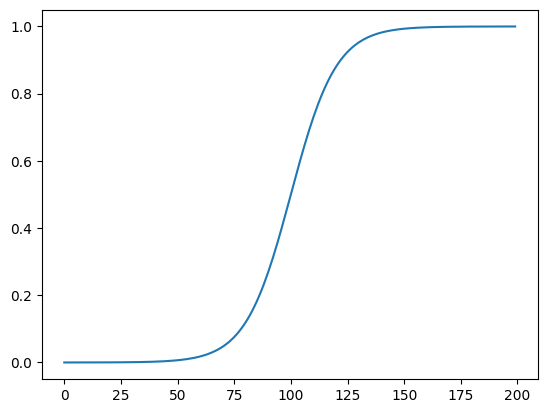

In [8]:
#piccolo check che funzioni bene 
pl.plot(sigmoid(np.arange(-10,10,0.1)))

In [9]:
#ora devo creare l'architettura
#PRIMA ANCORA devo definire la LOSS FUNCTION 

#tratto ciascun data punto come se fosse un dataset: non sommo le distanze ma ritorno un vettore delle distanze
# uso L1 per semplicità e non uso neanche il valore assoluto 
def loss(prediction, target): 
  return target-prediction
  

In [10]:
#Ho bisogno della derivata della act funct per poter calcolare il gradiente
def dsigmoid(x): 
  return x * (1. -x)

In [11]:
#Ora si che posso iniziare con il NN

#devo inizializzare i weights e bias, che poi ottimizzerò usando il gradient descent

np.random.seed(420)
training = 6000

In [12]:
#layer di synapsi/neuroni 
# 4 x 3 dot 3 x 1 boh controlla

syn0 = 2* np.random.random((3,1)) -1 #inizializzo i pesi
#per semplificare il bias è zero e non lo uso 
syn0

array([[-0.36870817],
       [-0.09393865],
       [-0.46603547]])

In [13]:



loss_output = []

for iter in range(training):
  input_layer = X #potrebbe stare fuori dal loop

  #parte di FORWARD PROPAGATION 
  l1 = np.dot(input_layer,syn0)  #dot prod tra l'input e il layer di sinapsi, è la sommma pesata 


  #ACTIVATION FUNCTION
  output = sigmoid(l1) #passo alla sigmoide e questo è il mio outpu, senon volessi tarinare avrei finito 
  #siccome voglio traiare cambio le sinapsi 

  #Calcolo errore
  output_error = loss(output,y)
  loss_output.append(np.abs(output_error).sum())

  #come cambio i pesi sulla base dell' errore?
  #CALCOLO LA CORREZIONE 
  output_delta = output_error * dsigmoid(output) #moltiplico l'errore per il gradiente (gradient descent)

  #APPLICO LA CORREZIONE 
  syn0 += np.dot(input_layer.T, output_delta) #è quello che con più layer si chiamerà BACK PROPAGATION


print("output after cleanning: ", output)
print("target: ", y)


output after cleanning:  [[0.01255252]
 [0.98976999]
 [0.99169155]
 [0.0101992 ]]
target:  [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global Loss')

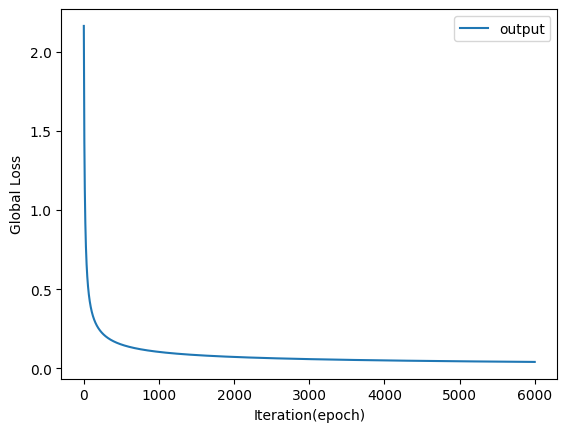

In [14]:
pl.plot(loss_output, label="output")
pl.legend()
pl.xlabel("Iteration(epoch)")
pl.ylabel("Global Loss")

#OSS se faccio girare più volte parto dal sistema già termalizzato, quindi la curva cambia!

#Doppio layer

In [15]:

syn0 = 2* np.random.random((3,5)) -1 #inizializzo i pesi

syn1 = 2* np.random.random((5,1)) -1



loss_output = []
loss_hidden = []

for iter in range(training):
  input_layer = X 
  l1 = np.dot(input_layer,syn0)
  hidden =sigmoid(l1)
  
  


  l2=np.dot(hidden,syn1)

  
  output = sigmoid(l2)
  output_error = loss(output,y)
  loss_output.append(np.abs(output_error).sum())
  output_delta = output_error * dsigmoid(output) #moltiplico l'errore per il gradiente (gradient descent)
  
  hidden_error=output_delta.dot(syn1.T)  #CORREZIONE DI IERI!!!!
  hidden_delta = hidden_error * dsigmoid(hidden)
  loss_hidden.append(np.abs(hidden_error).sum())

  #CALCOLO LA CORREZIONE 

  #APPLICO LA CORREZIONE 
  syn0 += np.dot(input_layer.T, hidden_delta) #è quello che con più layer si chiamerà BACK PROPAGATION
  syn1 += np.dot(hidden.T, output_delta)

print("output after cleanning: ", output)
print("target: ", y)


output after cleanning:  [[0.00624908]
 [0.99362521]
 [0.99452437]
 [0.00473305]]
target:  [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global Loss')

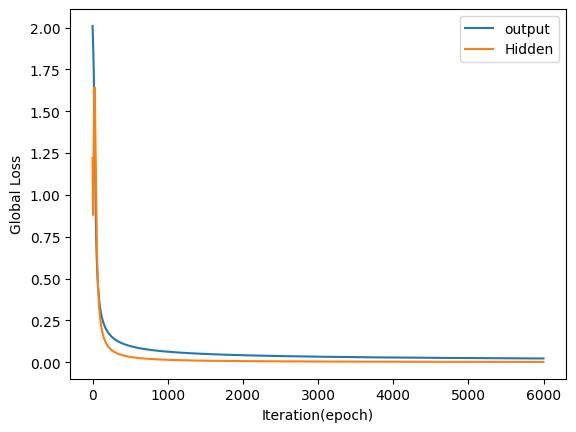

In [16]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="Hidden")
pl.plot()
pl.legend()
pl.xlabel("Iteration(epoch)")
pl.ylabel("Global Loss")

#OSS se faccio girare più volte parto dal sistema già termalizzato, quindi la curva cambia!

##Lezione Convolutional NN

Rifaccio la stessa cosa ma uso Tensorflow

In [17]:
from tensorflow import keras

In [21]:
#creo l'hidden layer
hlayer = keras.layers.Dense(5,input_dim=3,activation="sigmoid") #dense multilayer perceptron (?)
#gli passo il numero di neuroni che voglio nel layer, la dimensione dell'input e la act. function


#creo l'output layer
olayer = keras.layers.Dense(1, activation = "linear")
#ho trattato il problema come regression, quindi do un neurone in output
#act func. lineare perchè regressione con sigmoid non funziona bene 

#creo il modello: 
model = keras.Sequential([hlayer,olayer])


#
model.summary()
#mostro che già questo modello giocattolo ha 26 parametri!

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss = "mae", optimizer = "adam", metrics = ["accuracy","mae"]) 
#mae = mean absolute error (diversa da prima ma funziona meglio)
#adam è il modo in cui faccio il gradient descent
#poi scelgo la metrica, uso questa perchè a posteriori così converge ma metto anche l'altra così vedo cosa succede







In [26]:
model.fit(X, y, epochs=1000) #gli passo train, target e numero di epoche

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6375 - accuracy: 0.5000 - mae: 0.6375
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6367 - accuracy: 0.5000 - mae: 0.6367
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6360 - accuracy: 0.5000 - mae: 0.6360
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6353 - accuracy: 0.5000 - mae: 0.6353
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.6346 - accuracy: 0.5000 - mae: 0.6346
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.6338 - accuracy: 0.5000 - mae: 0.6338
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6331 - accuracy: 0.5000 - mae: 0.6331
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6324 - accuracy: 0.5000 - mae: 0.6324
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6317 - accuracy: 0.5000

fa comunque 1000 epoche anche se in realtà è arrivato ad accuratezza 100%


In [29]:
print(model.predict(X))
print(y)

#in realtà non buona convergenza, rispetto al codice della prof

1/1 [==============================] - 0s 110ms/step
[[0.39503014]
 [0.9780669 ]
 [0.9981543 ]
 [0.38105762]]
[[0]
 [1]
 [1]
 [0]]
